In [178]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
import os
import yellowbrick
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from yellowbrick.datasets import load_spam


# --- Libraries Settings ---
pd.set_option("display.precision", 4)
warnings.filterwarnings('ignore')
sb.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

In [179]:
data = pd.read_csv('cardio_train.csv',delimiter=';')
data = data.drop(columns=['id'])
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [180]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000
mean,19468.8658,1.3496,164.3592,74.2057,128.8173,96.6304,1.3669,1.2265,0.0881,0.0538,0.8037,0.4997
std,2467.2517,0.4768,8.2101,14.3958,154.0114,188.4725,0.6803,0.5723,0.2835,0.2256,0.3972,0.5000
min,10798.0000,1.0000,55.0000,10.0000,-150.0000,-70.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25%,17664.0000,1.0000,159.0000,65.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000
50%,19703.0000,1.0000,165.0000,72.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000
75%,21327.0000,2.0000,170.0000,82.0000,140.0000,90.0000,2.0000,1.0000,0.0000,0.0000,1.0000,1.0000
max,23713.0000,2.0000,250.0000,200.0000,16020.0000,11000.0000,3.0000,3.0000,1.0000,1.0000,1.0000,1.0000


In [181]:
duplicate_sum = data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')
    
data.drop_duplicates(keep = 'first', inplace = True)

Duplicates Rows in Dataset are : 24


In [182]:
outlier = ((data["ap_hi"]>200) | (data["ap_lo"]>140) | (data["ap_lo"]<50) | (data["ap_hi"]<80) | (data["height"]<140 ) | (data["height"]>220)|(data["weight"]<35))  
print("There is {} outlier".format(data[outlier]["cardio"].count()))

There is 1500 outlier


In [183]:
data = data[~outlier]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000
mean,19464.1750,1.3489,164.4656,74.1233,126.5681,81.3350,1.3648,1.2259,0.0881,0.0536,0.8035,0.4947
std,2467.8669,0.4766,7.8011,14.2641,16.5346,9.4471,0.6791,0.5719,0.2834,0.2251,0.3973,0.5000
min,10798.0000,1.0000,140.0000,35.0000,80.0000,50.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25%,17658.0000,1.0000,159.0000,65.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000
50%,19700.0000,1.0000,165.0000,72.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000
75%,21323.0000,2.0000,170.0000,82.0000,140.0000,90.0000,2.0000,1.0000,0.0000,0.0000,1.0000,1.0000
max,23713.0000,2.0000,207.0000,200.0000,200.0000,140.0000,3.0000,3.0000,1.0000,1.0000,1.0000,1.0000


In [184]:
data[['cardio']] = data[['cardio']].astype(str)
data['year']= (data['age']/365).round(0)
data['height(m)']= (data['height']/100).round(3)
data['BMI']= (data['weight']/((data['height(m)'])*data['height(m)'])).round(2)
data['MAP']= data['ap_lo']+((data['ap_hi']+data['ap_lo'])/3)
data = data.drop(columns=['height','age'])

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68476 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68476 non-null  int64  
 1   weight       68476 non-null  float64
 2   ap_hi        68476 non-null  int64  
 3   ap_lo        68476 non-null  int64  
 4   cholesterol  68476 non-null  int64  
 5   gluc         68476 non-null  int64  
 6   smoke        68476 non-null  int64  
 7   alco         68476 non-null  int64  
 8   active       68476 non-null  int64  
 9   cardio       68476 non-null  object 
 10  year         68476 non-null  float64
 11  height(m)    68476 non-null  float64
 12  BMI          68476 non-null  float64
 13  MAP          68476 non-null  float64
dtypes: float64(5), int64(8), object(1)
memory usage: 7.8+ MB


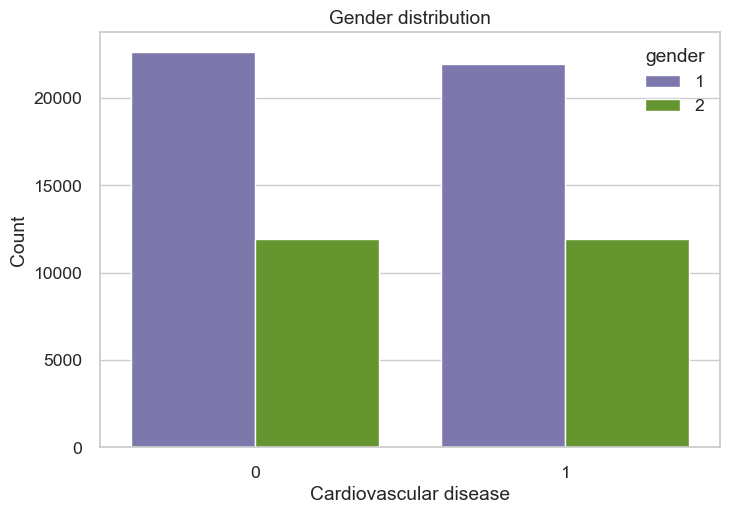

In [186]:
#using seaborns countplot 
sb.countplot(data = data,x='cardio',hue='gender')
#setting axis labels
plt.title('Gender distribution')
plt.xlabel('Cardiovascular disease')
plt.ylabel('Count');

In [187]:
womendata = data[data['gender'] == 1]
maledata = data[data['gender'] == 2]

### Starting With womendata

In [188]:
womendata = womendata.drop(columns=['gender'])
womendata.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m),BMI,MAP
1,85.0,140,90,3,1,0,0,1,1,55.0,1.56,34.93,166.6667
2,64.0,130,70,3,1,0,0,0,1,52.0,1.65,23.51,136.6667
4,56.0,100,60,1,1,0,0,0,0,48.0,1.56,23.01,113.3333
5,67.0,120,80,2,2,0,0,0,0,60.0,1.51,29.38,146.6667
6,93.0,130,80,3,1,0,0,1,0,61.0,1.57,37.73,150.0000


In [189]:
womendata.describe()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI,MAP
count,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000
mean,72.4827,125.8381,80.8705,1.3829,1.2347,0.0178,0.0253,0.8019,53.4424,1.6147,27.8582,149.7733
std,14.0806,16.6190,9.4936,0.6924,0.5827,0.1323,0.1569,0.3986,6.6665,0.0661,5.5332,17.0947
min,35.0000,80.0000,50.0000,1.0000,1.0000,0.0000,0.0000,0.0000,30.0000,1.4000,12.2500,93.3333
25%,63.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,49.0000,1.5700,23.8800,143.3333
50%,70.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,54.0000,1.6200,26.6700,146.6667
75%,80.0000,140.0000,90.0000,2.0000,1.0000,0.0000,0.0000,1.0000,58.0000,1.6600,30.8600,163.3333
max,200.0000,200.0000,140.0000,3.0000,3.0000,1.0000,1.0000,1.0000,65.0000,1.9800,68.3100,253.3333


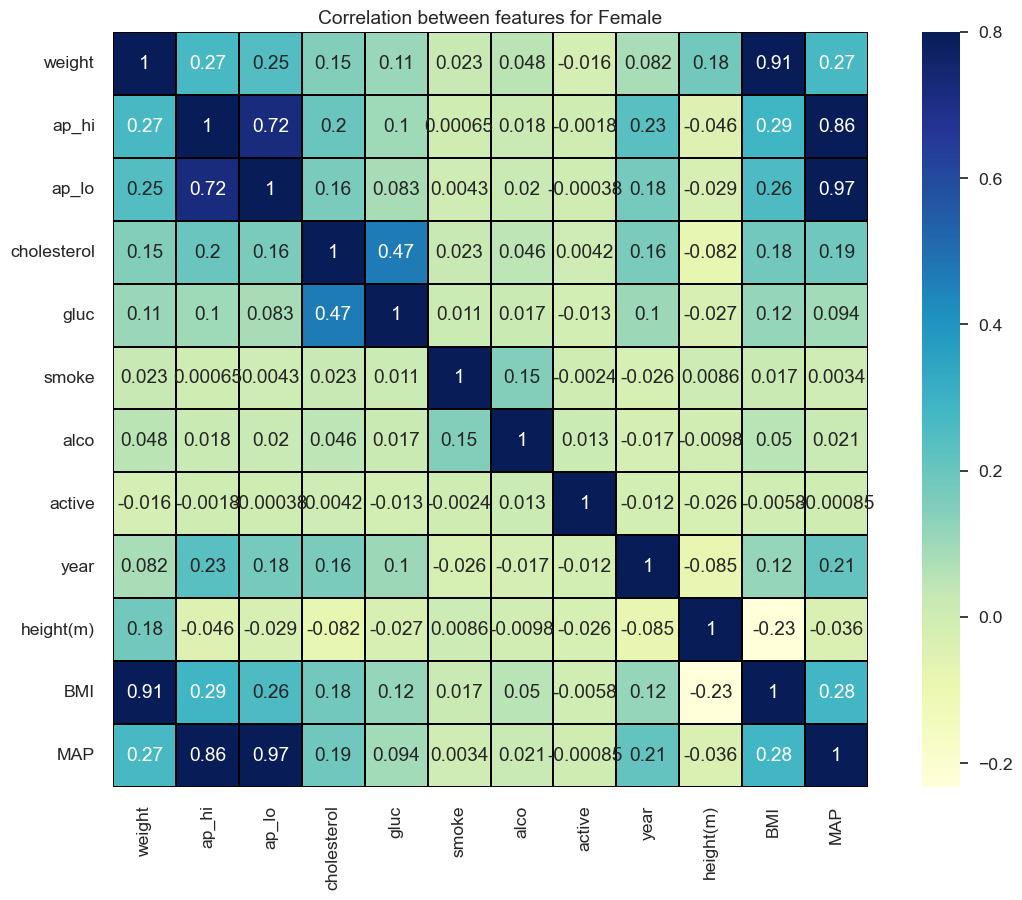

In [190]:
womendata.corr()
corr = womendata.corr()

sb.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sb.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features for Female');

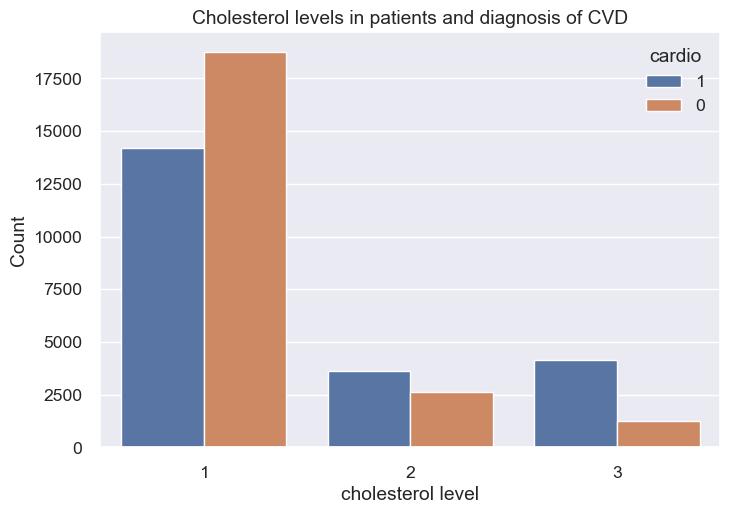

In [191]:
#using a clustered bar chart
sb.countplot(data = womendata,x='cholesterol',hue='cardio')
plt.title('Cholesterol levels in patients and diagnosis of CVD')
plt.xlabel('cholesterol level')
plt.ylabel('Count');

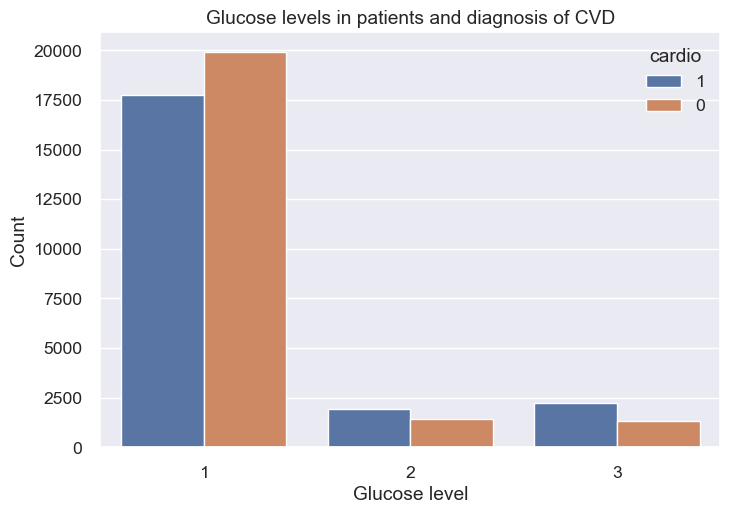

In [192]:
#using a clustered bar chart
sb.countplot(data = womendata,x='gluc',hue='cardio')
plt.title('Glucose levels in patients and diagnosis of CVD')
plt.xlabel('Glucose level')
plt.ylabel('Count');

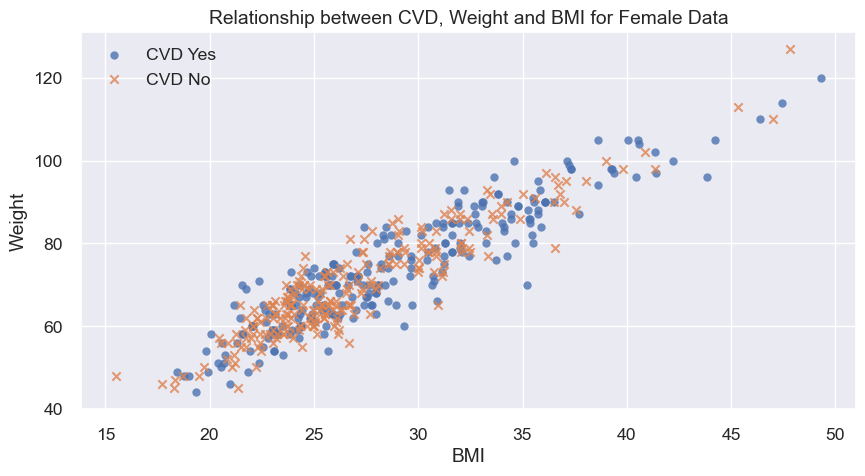

In [193]:
#creating a seed for reproducibility for my random sample from the cardio dataset
womendata[['cardio']] = womendata[['cardio']].astype(str)
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(womendata.shape[0],500,replace = False)
cardio_subset = womendata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','x']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI for Female Data')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.legend(['CVD Yes','CVD No']);

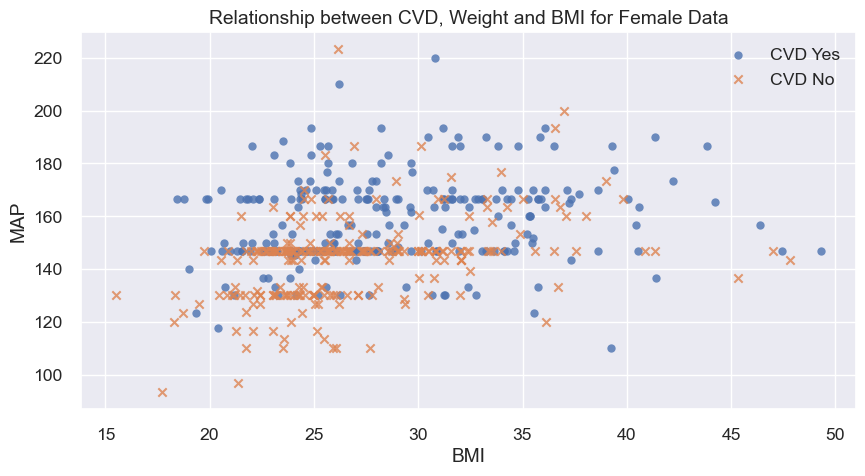

In [194]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(womendata.shape[0],500,replace = False)
cardio_subset = womendata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','x']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='MAP',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI for Female Data')
plt.xlabel('BMI')
plt.ylabel('MAP')
plt.legend(['CVD Yes','CVD No']);

In [195]:
womendata.describe()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI,MAP
count,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000
mean,72.4827,125.8381,80.8705,1.3829,1.2347,0.0178,0.0253,0.8019,53.4424,1.6147,27.8582,149.7733
std,14.0806,16.6190,9.4936,0.6924,0.5827,0.1323,0.1569,0.3986,6.6665,0.0661,5.5332,17.0947
min,35.0000,80.0000,50.0000,1.0000,1.0000,0.0000,0.0000,0.0000,30.0000,1.4000,12.2500,93.3333
25%,63.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,49.0000,1.5700,23.8800,143.3333
50%,70.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,54.0000,1.6200,26.6700,146.6667
75%,80.0000,140.0000,90.0000,2.0000,1.0000,0.0000,0.0000,1.0000,58.0000,1.6600,30.8600,163.3333
max,200.0000,200.0000,140.0000,3.0000,3.0000,1.0000,1.0000,1.0000,65.0000,1.9800,68.3100,253.3333


In [196]:
X = womendata.drop(['cardio', 'height(m)', 'weight', 'gluc', 'smoke', 'alco', 'active'], axis =1)
y = pd.DataFrame(womendata['cardio'])
y.head()

,cardio
1,1
2,1
4,0
5,0
6,0


In [197]:
X.head()

,ap_hi,ap_lo,cholesterol,year,BMI,MAP
1,140,90,3,55.0,34.93,166.6667
2,130,70,3,52.0,23.51,136.6667
4,100,60,1,48.0,23.01,113.3333
5,120,80,2,60.0,29.38,146.6667
6,130,80,3,61.0,37.73,150.0000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7271860719392189

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7270688495178291



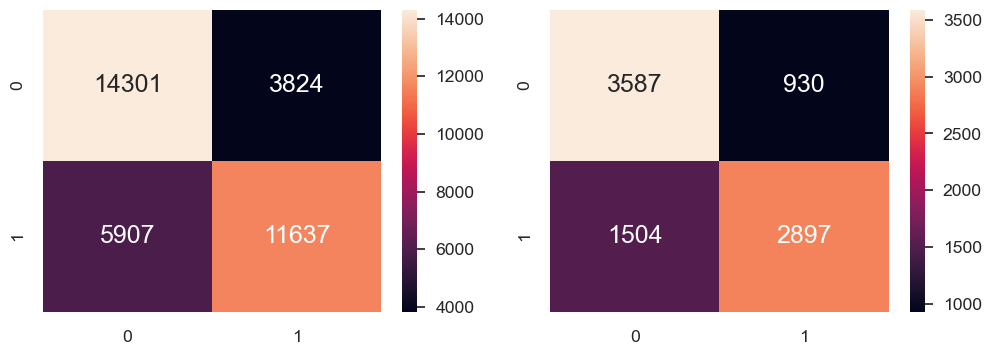

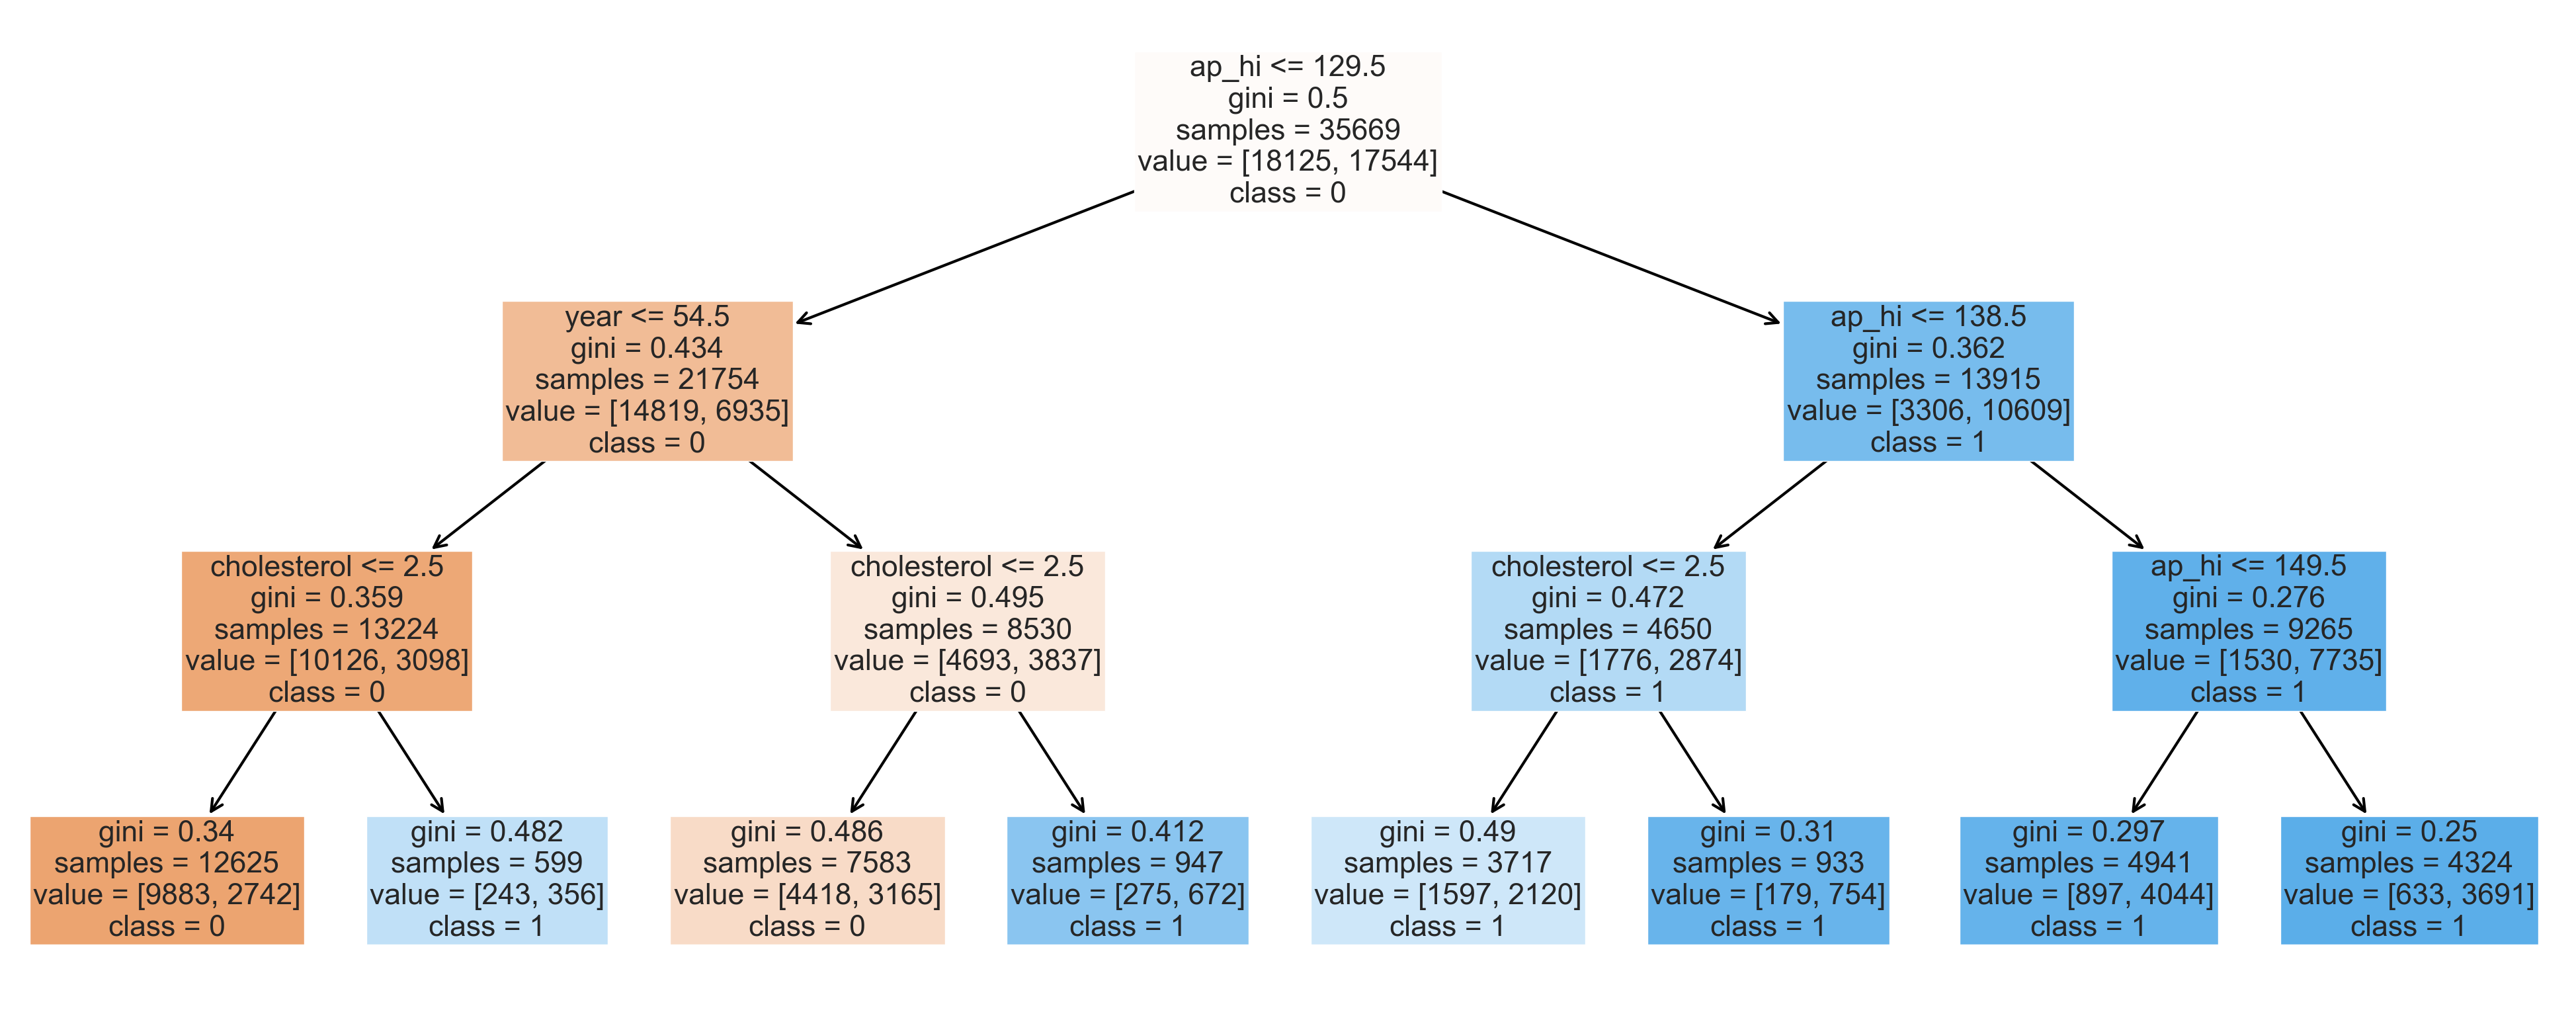

In [198]:
# Import essential models and functions from sklearn(male data)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
DTCAcc = dectree.score(X_test, y_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 20))
out = plot_tree(dectree, 
                fontsize =32,
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [199]:
X_test

,ap_hi,ap_lo,cholesterol,year,BMI,MAP
1871,110,70,1,52.0,28.72,130.0000
11840,110,70,1,54.0,23.37,130.0000
17204,100,90,2,60.0,25.86,153.3333
25049,150,90,1,54.0,40.58,170.0000
33198,130,80,2,64.0,32.56,150.0000
...,...,...,...,...,...,...
22373,140,90,1,62.0,29.07,166.6667
2477,120,80,1,54.0,24.80,146.6667
33775,100,70,1,46.0,22.38,126.6667
8089,160,80,3,56.0,28.23,160.0000


In [200]:
X_test.head()

,ap_hi,ap_lo,cholesterol,year,BMI,MAP
1871,110,70,1,52.0,28.72,130.0000
11840,110,70,1,54.0,23.37,130.0000
17204,100,90,2,60.0,25.86,153.3333
25049,150,90,1,54.0,40.58,170.0000
33198,130,80,2,64.0,32.56,150.0000


In [201]:
# sc = StandardScaler()
# print(X_test)
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)
# --- Applying Logistic Regression ---
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train, y_train)
# --- Predicting the test values ---
y_pred_lr = classifier_lr.predict(X_test)
# # --- Scoring ---
# acc_lr = accuracy_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)
# --- LR Accuracy ---
acc_lr = accuracy_score(y_pred_lr, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(acc_lr*100)+' .:.')

# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(X_train, y_train)

y_pred_SVM = SVMclassifier.predict(X_test)
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, y_train)

y_pred_GNB = GNBclassifier.predict(X_test)
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')


# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)


ETclassifier = ExtraTreesClassifier# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

ETclassifier.fit(X_train, y_train)
y_pred_ET = ETclassifier.predict(X_test)
# --- ET Accuracy ---
ETAcc = accuracy_score(y_pred_ET, y_test)
print('.:. Extra Tree Classifier Accuracy:'+'\033[1m {:.2f}%'.format(ETAcc*100)+' .:.')

# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(X_train, y_train)
y_pred_GB = GBclassifier.predict(X_test)
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model for Female': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [acc_lr*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

.:. Logistic Regression Accuracy: 73.28% .:.
.:. K-Nearest Neighbour Accuracy: 67.44% .:.
.:. Support Vector Machine Accuracy: 42.94% .:.
.:. Gaussian Naive Bayes Accuracy: 70.44% .:.
.:. Random Forest Accuracy: 73.12% .:.
.:. Extra Tree Classifier Accuracy: 65.16% .:.
.:. Gradient Boosting Accuracy: 73.28% .:.
.:. AdaBoost Accuracy: 72.49% .:.


Model for Female,Accuracy
Logistic Regression,73.278762
Gradient Boosting,73.278762
Random Forest,73.121776
Decision Tree,72.706885
AdaBoost,72.493833
Gaussian Naive Bayes,70.441803
K-Nearest Neighbour,67.436645
Extra Tree Classifier,65.160350
Support Vector Machine,42.935636


In [202]:
# --- LR Accuracy ---
acc_lr = accuracy_score(y_pred_lr, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(acc_lr*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_lr))

.:. Logistic Regression Accuracy: 73.28% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      4517
           1       0.76      0.67      0.71      4401

    accuracy                           0.73      8918
   macro avg       0.74      0.73      0.73      8918
weighted avg       0.74      0.73      0.73      8918




.: Performance Evaluation
**************************


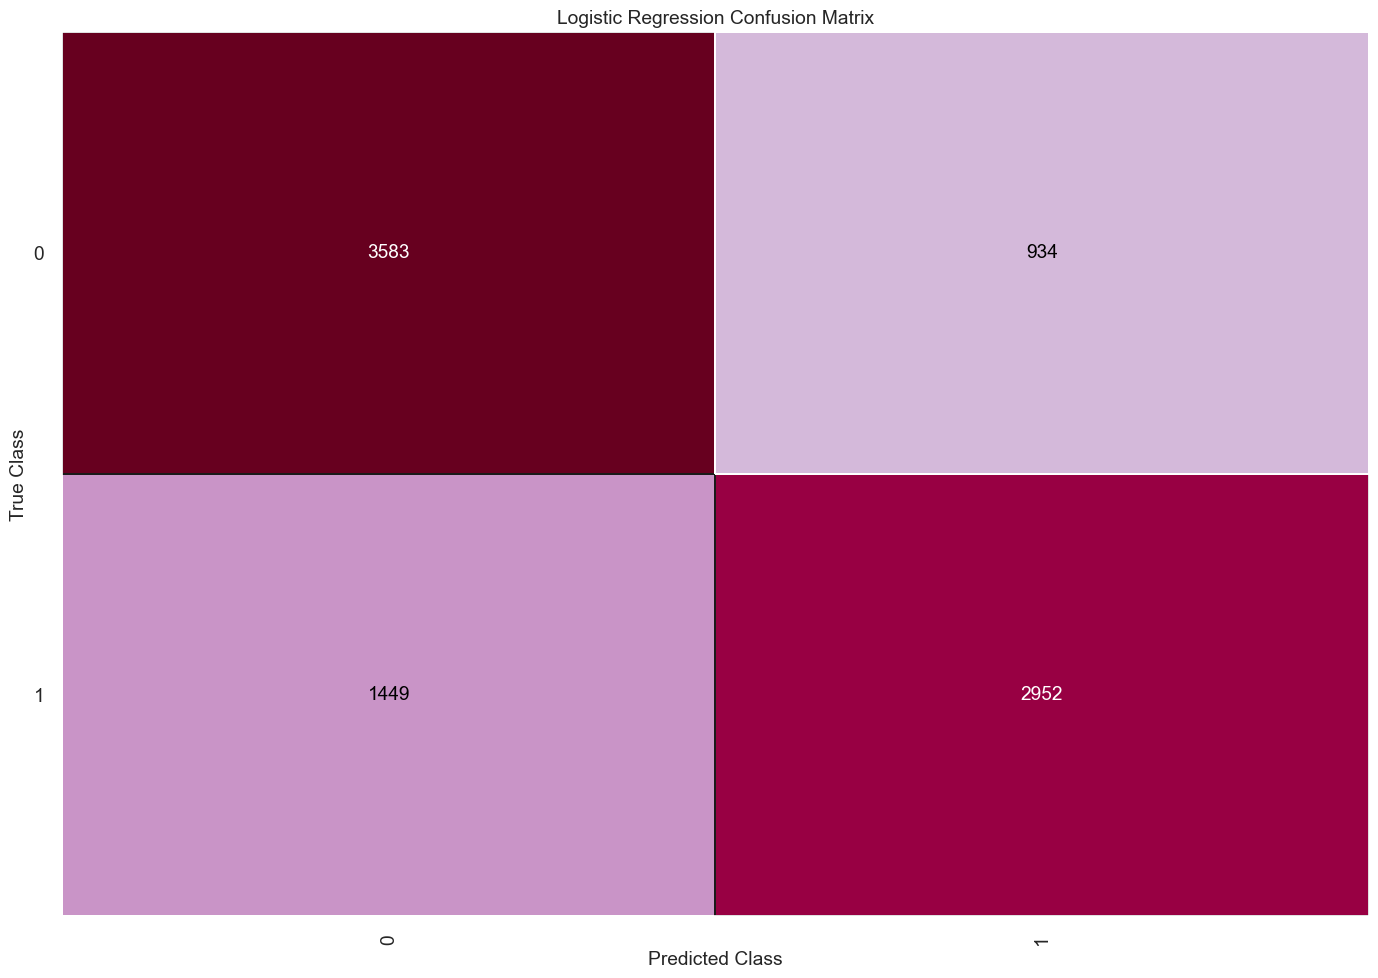

In [203]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, (ax1) = plt.subplots(1, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(classifier_lr, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()


In [204]:
print("Welcome to the predictor for Cardio disease! Input your known values for an individual. \n")

year = float(input("Enter age: "))
ap_hi = float(input("Enter the values of the systolic pressure: "))
ap_lo = float(input("Enter the values of the diastolic pressure: "))
MAP = float(input("Enter the values of the MAP: "))
cholesterol = float(input("Enter the values of the cholesterol: "))
BMI = float(input("Enter the values of the bmi: "))

d = np.array([[ap_hi, ap_lo, cholesterol, year, BMI, MAP],
             ])
# pred_scaler = StandardScaler()
# data = pred_scaler.fit_transform(d)
# print(data)
# scaled = pred_scaler.inverse_transform(data)
# print(scaled)
pred = classifier_lr.predict(d)

print(pred[0])
if float(pred[0]) == 1:
    print("The individual is likely to have cardio disease. ")
else:
    print("The individual is likely to not have cardio disease.")


Welcome to the predictor for Cardio disease! Input your known values for an individual. 



KeyboardInterrupt: Interrupted by user

#### Starting with Maledata 

In [205]:
maledata = maledata.drop(columns=['gender'])
maledata.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m),BMI,MAP
0,62.0,110,80,1,1,0,0,1,0,50.0,1.68,21.97,143.3333
3,82.0,150,100,1,1,0,0,1,1,48.0,1.69,28.71,183.3333
7,95.0,130,90,3,3,0,0,1,1,62.0,1.78,29.98,163.3333
11,60.0,120,80,1,1,0,0,1,0,52.0,1.73,20.05,146.6667
12,60.0,120,80,1,1,0,0,0,0,41.0,1.65,22.04,146.6667


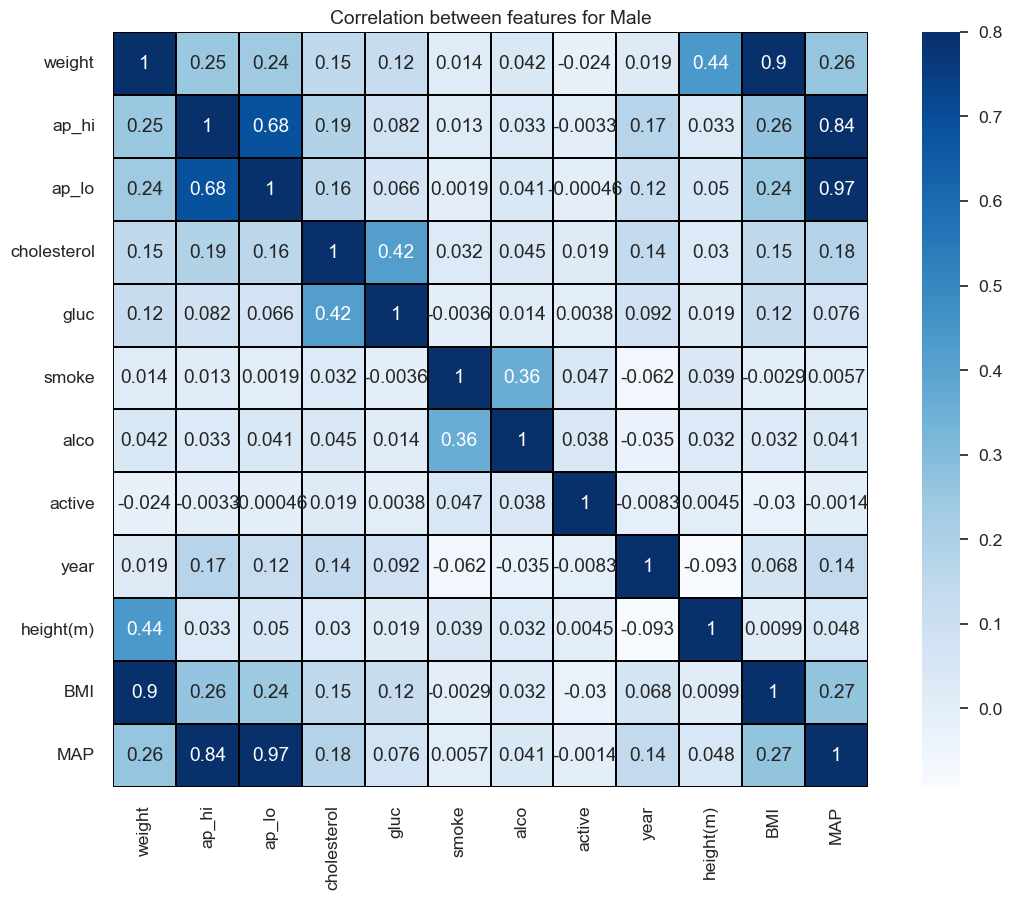

In [206]:
maledata.corr()
corr = maledata.corr()
sb.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sb.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="black")
plt.title('Correlation between features for Male');

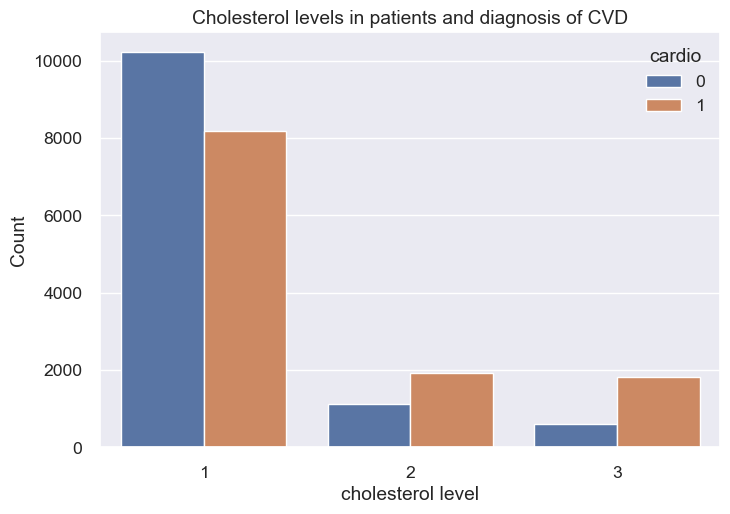

In [207]:
#using a clustered bar chart
sb.countplot(data = maledata,x='cholesterol',hue='cardio')
plt.title('Cholesterol levels in patients and diagnosis of CVD')
plt.xlabel('cholesterol level')
plt.ylabel('Count');

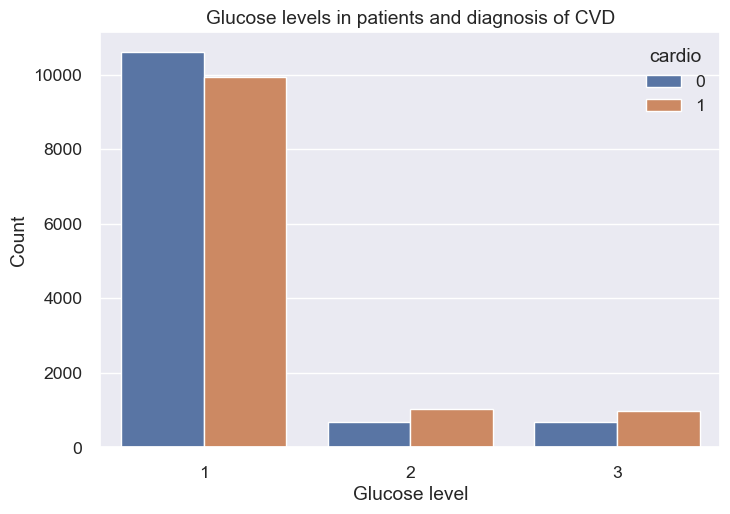

In [208]:
#using a clustered bar chart
sb.countplot(data = maledata,x='gluc',hue='cardio')
plt.title('Glucose levels in patients and diagnosis of CVD')
plt.xlabel('Glucose level')
plt.ylabel('Count');

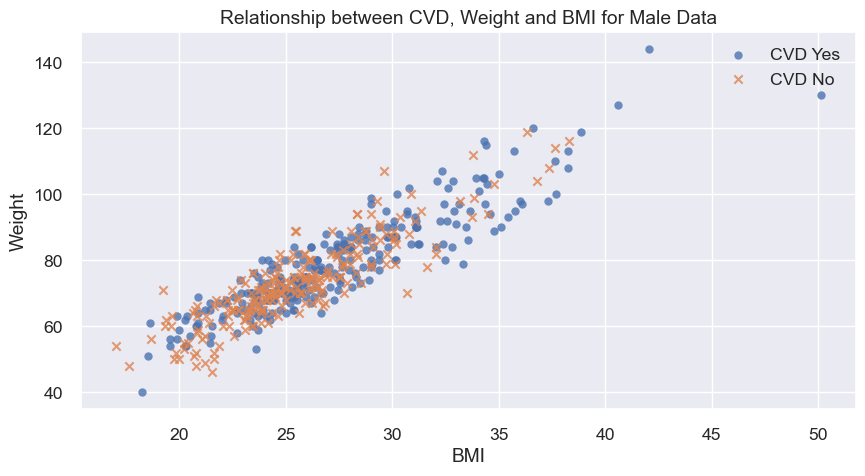

In [209]:
#creating a seed for reproducibility for my random sample from the cardio dataset
maledata[['cardio']] = maledata[['cardio']].astype(str)
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(maledata.shape[0],500,replace = False)
cardio_subset = maledata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','x']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI for Male Data')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.legend(['CVD Yes','CVD No']);

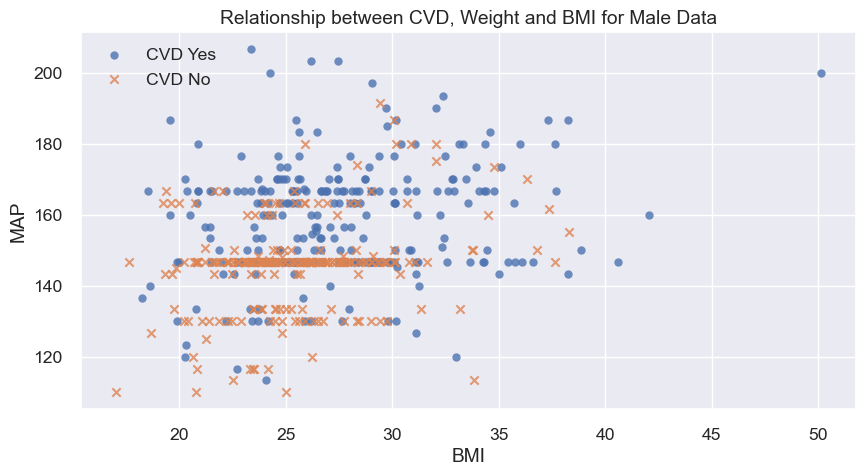

In [210]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(maledata.shape[0],500,replace = False)
cardio_subset = maledata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','x']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='MAP',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI for Male Data')
plt.xlabel('BMI')
plt.ylabel('MAP')
plt.legend(['CVD Yes','CVD No']);

In [211]:
maledata.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m),BMI,MAP
0,62.0,110,80,1,1,0,0,1,0,50.0,1.68,21.97,143.3333
3,82.0,150,100,1,1,0,0,1,1,48.0,1.69,28.71,183.3333
7,95.0,130,90,3,3,0,0,1,1,62.0,1.78,29.98,163.3333
11,60.0,120,80,1,1,0,0,1,0,52.0,1.73,20.05,146.6667
12,60.0,120,80,1,1,0,0,0,0,41.0,1.65,22.04,146.6667


In [212]:
y = pd.DataFrame(maledata['cardio'])
X = maledata = maledata.drop(columns=['height(m)', 'weight', 'gluc', 'smoke', 'alco', 'active','cardio'])
maledata.describe()

,ap_hi,ap_lo,cholesterol,year,BMI,MAP
count,23889.0000,23889.0000,23889.0000,23889.0000,23889.0000,23889.0000
mean,127.9304,82.2020,1.3309,53.1089,26.6471,152.2462
std,16.2892,9.2981,0.6521,6.9454,4.3538,16.5948
min,80.0000,50.0000,1.0000,30.0000,13.5200,93.3333
25%,120.0000,80.0000,1.0000,48.0000,23.7400,146.6667
50%,120.0000,80.0000,1.0000,54.0000,25.8800,146.6667
75%,140.0000,90.0000,1.0000,58.0000,29.0100,163.3333
max,200.0000,140.0000,3.0000,65.0000,65.3800,253.3333


In [213]:
X.head()

,ap_hi,ap_lo,cholesterol,year,BMI,MAP
0,110,80,1,50.0,21.97,143.3333
3,150,100,1,48.0,28.71,183.3333
7,130,90,3,62.0,29.98,163.3333
11,120,80,1,52.0,20.05,146.6667
12,120,80,1,41.0,22.04,146.6667


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7206320966982366

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7166178317287568



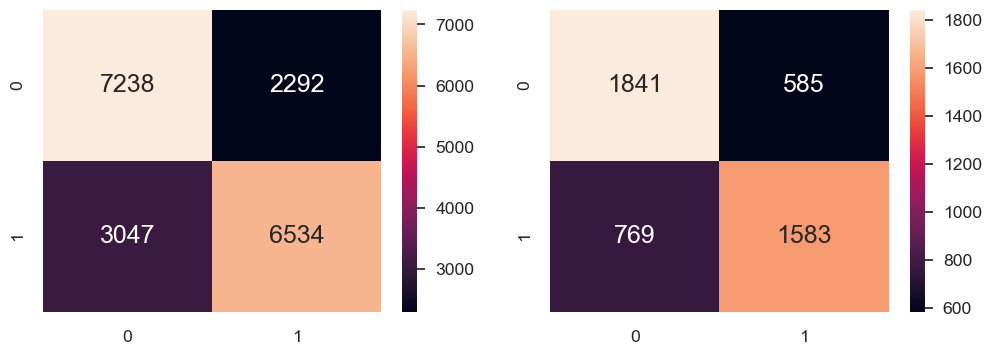

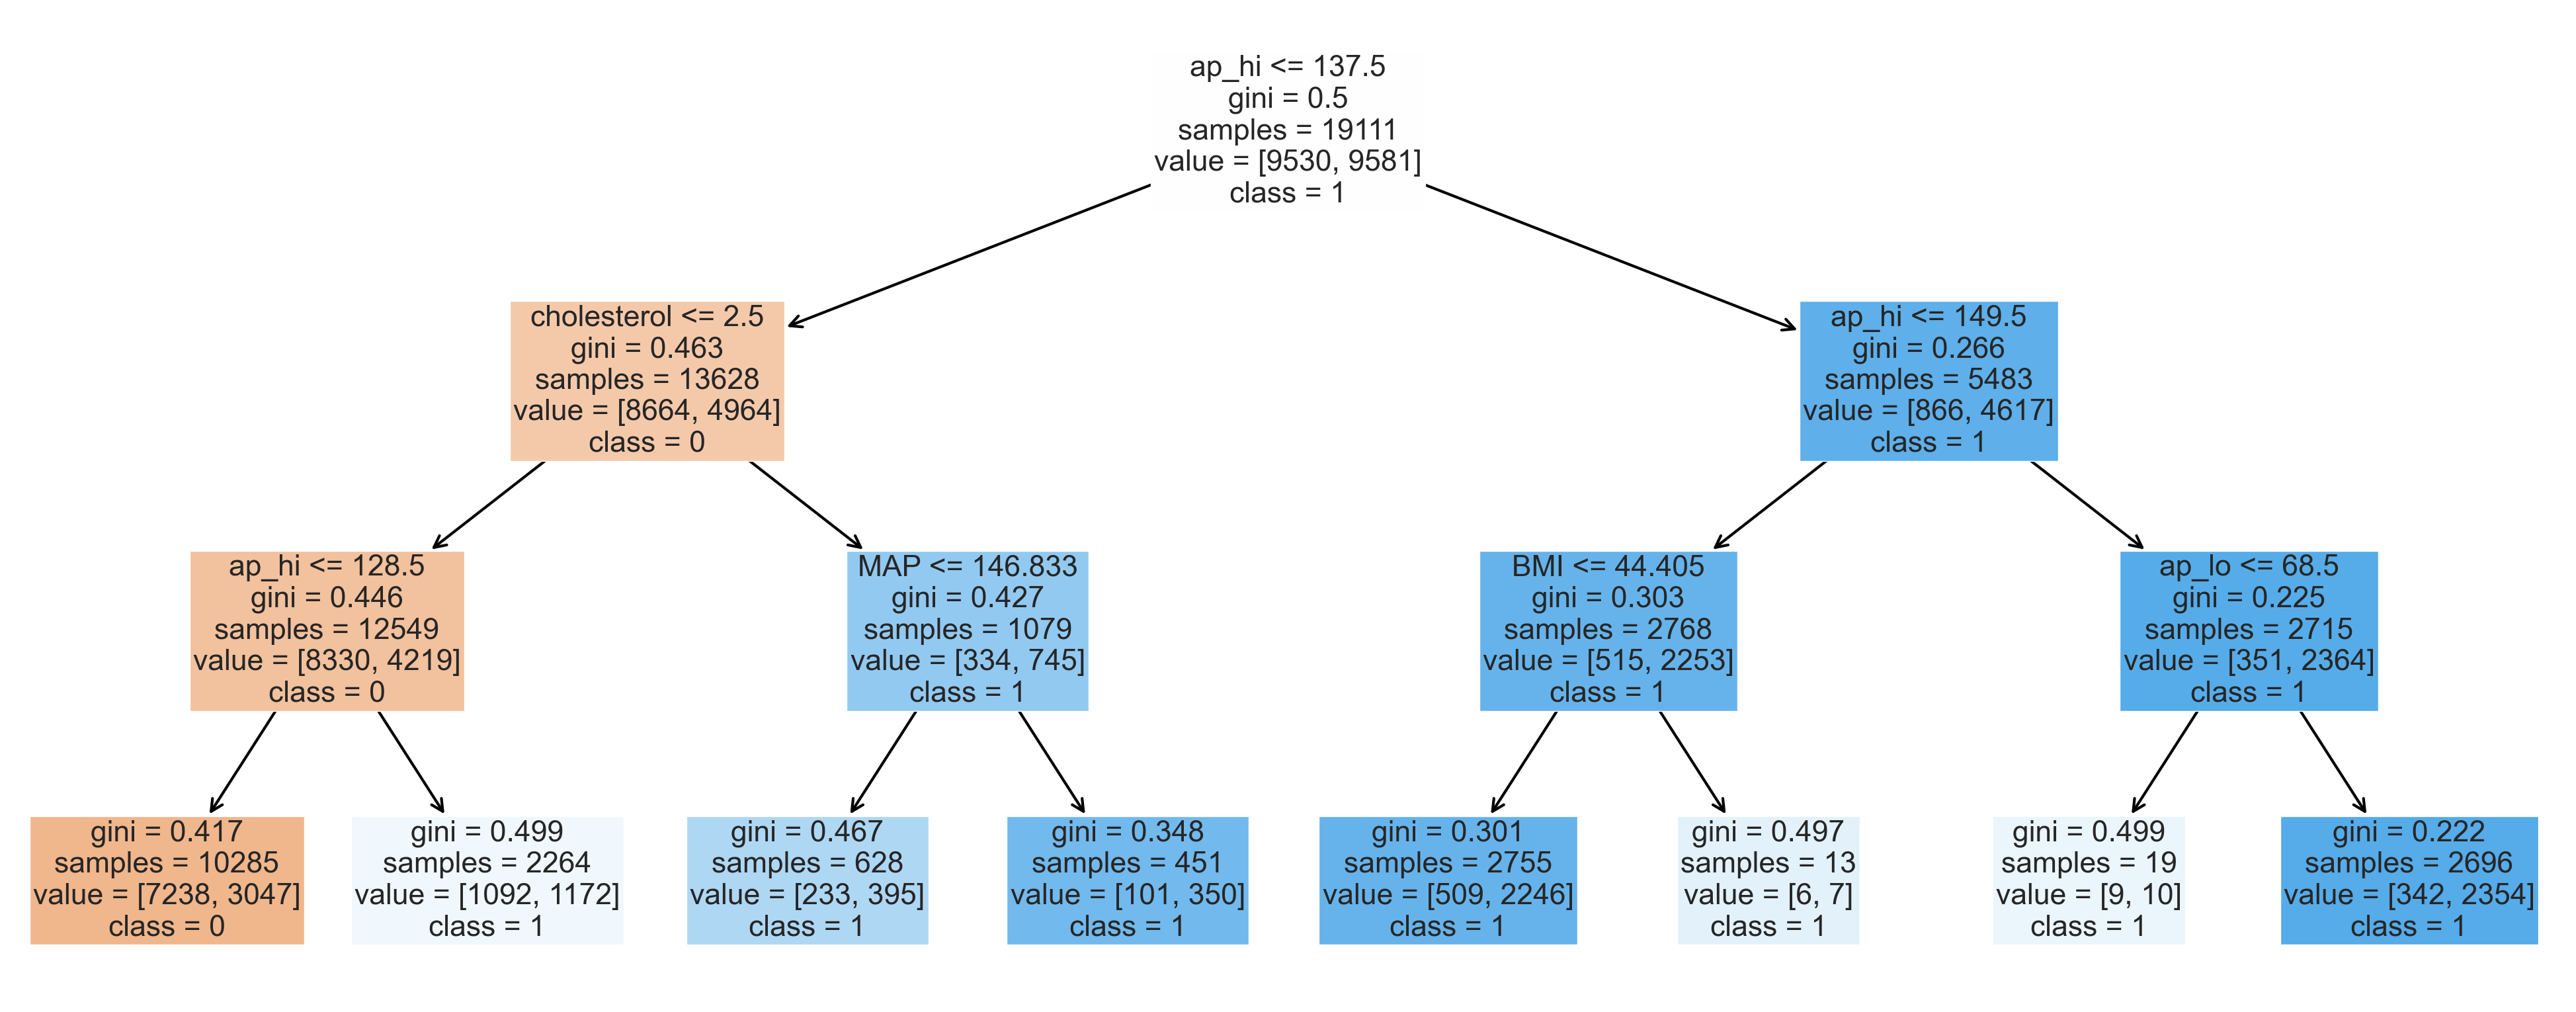

In [214]:
# Import essential models and functions from sklearn(male data)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
DTCAcc = dectree.score(X_test, y_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 20))
out = plot_tree(dectree, 
                fontsize =32,
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In [215]:
# sc = StandardScaler()
# print(X_test)
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)
# --- Applying Logistic Regression ---
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train, y_train)
# --- Predicting the test values ---
y_pred_lr = classifier_lr.predict(X_test)
# # --- Scoring ---
# acc_lr = accuracy_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)
# --- LR Accuracy ---
acc_lr = accuracy_score(y_pred_lr, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(acc_lr*100)+' .:.')

# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(X_train, y_train)

y_pred_SVM = SVMclassifier.predict(X_test)
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, y_train)

y_pred_GNB = GNBclassifier.predict(X_test)
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')


# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)


ETclassifier = ExtraTreesClassifier# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

ETclassifier.fit(X_train, y_train)
y_pred_ET = ETclassifier.predict(X_test)
# --- ET Accuracy ---
ETAcc = accuracy_score(y_pred_ET, y_test)
print('.:. Extra Tree Classifier Accuracy:'+'\033[1m {:.2f}%'.format(ETAcc*100)+' .:.')

# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(X_train, y_train)
y_pred_GB = GBclassifier.predict(X_test)
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model for Female': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [acc_lr*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

.:. Logistic Regression Accuracy: 71.52% .:.
.:. K-Nearest Neighbour Accuracy: 67.54% .:.
.:. Support Vector Machine Accuracy: 30.18% .:.
.:. Gaussian Naive Bayes Accuracy: 69.19% .:.
.:. Random Forest Accuracy: 71.87% .:.
.:. Extra Tree Classifier Accuracy: 64.84% .:.
.:. Gradient Boosting Accuracy: 72.23% .:.
.:. AdaBoost Accuracy: 70.30% .:.


Model for Female,Accuracy
Gradient Boosting,72.226873
Random Forest,71.871076
Decision Tree,71.661783
Logistic Regression,71.515278
AdaBoost,70.301381
Gaussian Naive Bayes,69.192131
K-Nearest Neighbour,67.538719
Extra Tree Classifier,64.838845
Support Vector Machine,30.179992


In [216]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

.:. Gradient Boosting Accuracy: 72.23% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      2426
           1       0.75      0.65      0.70      2352

    accuracy                           0.72      4778
   macro avg       0.73      0.72      0.72      4778
weighted avg       0.73      0.72      0.72      4778




.: Performance Evaluation
**************************


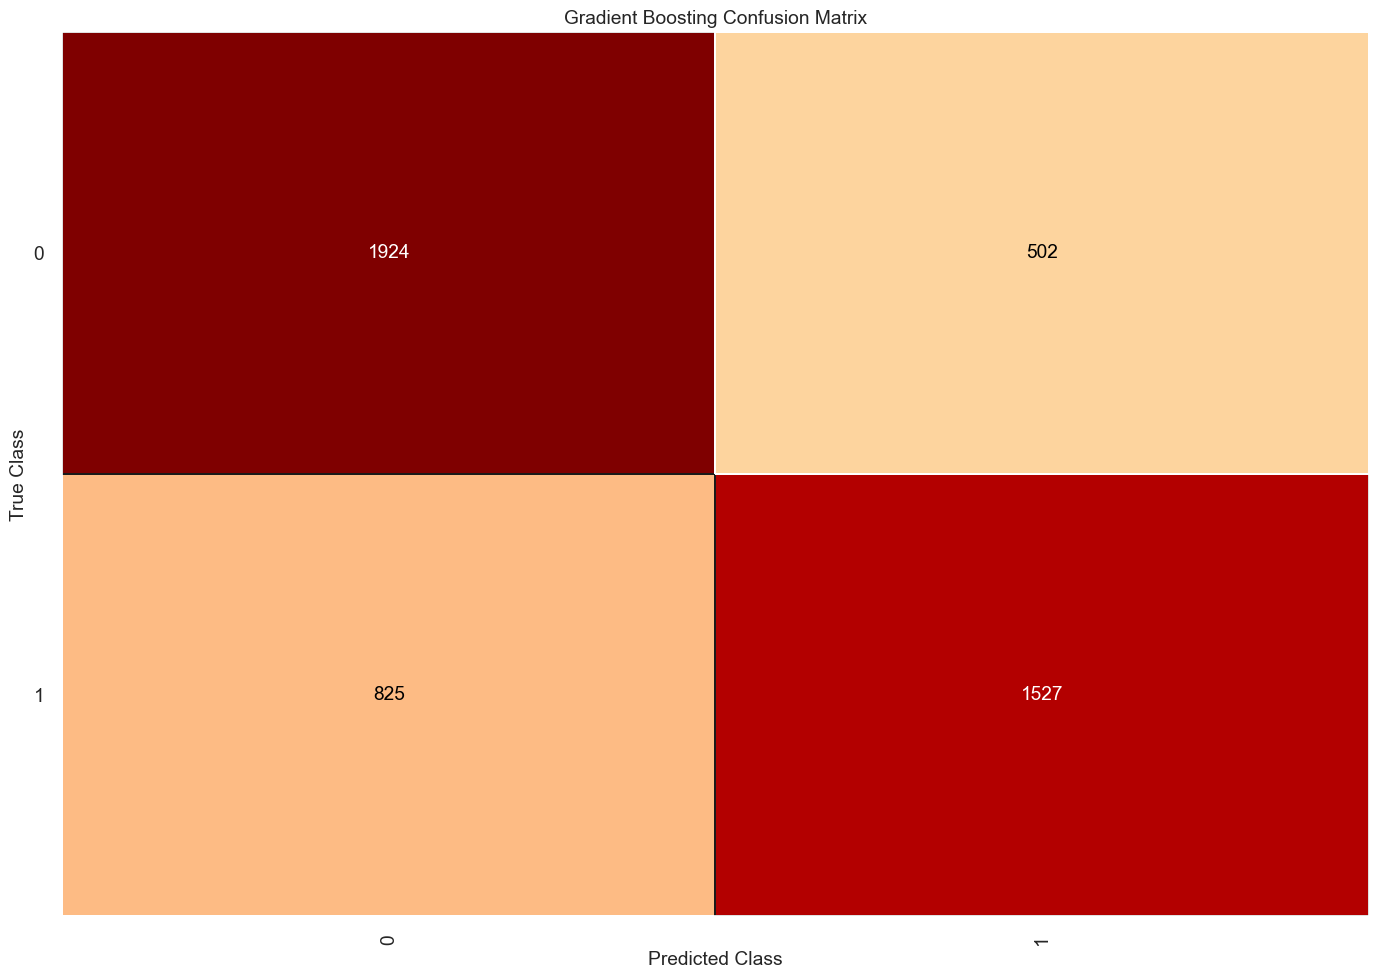

In [217]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, (ax1) = plt.subplots(1, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='OrRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(X_train, y_train)
gbcmatrix.score(X_test, y_test)
gbcmatrix.finalize()


In [218]:
## print("Welcome to the predictor for Cardio disease! Input your known values for an individual. \n")

year = float(input("Enter age: "))
ap_hi = float(input("Enter the values of the systolic pressure: "))
ap_lo = float(input("Enter the values of the diastolic pressure: "))
MAP = float(input("Enter the values of the MAP: "))
cholesterol = float(input("Enter the values of the cholesterol: "))
BMI = float(input("Enter the values of the bmi: "))

d = np.array([[ap_hi, ap_lo, cholesterol, year, BMI, MAP],
             ])
# pred_scaler = StandardScaler()
# data = pred_scaler.fit_transform(d)
# print(data)
# scaled = pred_scaler.inverse_transform(data)
# print(scaled)
pred = GBclassifier.predict(d)

print(pred[0])
if float(pred[0]) == 1:
    print("The individual is likely to have cardio disease. ")
else:
    print("The individual is likely to not have cardio disease.")


KeyboardInterrupt: Interrupted by user